In [1]:
#Importing the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the Orginal dataset
df = pd.read_csv('/content/drive/MyDrive/1-MMM_data.csv')

In [3]:
df

,DIVISION,DATE,SALES ($),DEMAND (No. of Handsets),SALES (No. of Handsets),CH1_SMS,CH2_Newspaper ads,CH3_Radio,CH4_TV,CH5_Pay Per Click,...,CH_8_Coupons,CH_9_Internet,CH_10_Email to customers,CH_11_Facebook Post,CH_12_Facebook ads,CH_13_Sponsership,CH_14_Newsletter article,CH_15_Direct mail,CH_16_Poster,"Variables,Adstock,Power,Lag"
0,HANDSET MANUFACTURING UNIT,01-01-2010,1533299.16,4384,4240,77.4819,14.104193,112.3370,1479.4565,95.3330,...,9.7020,722.571,91.0000,276.3636,756.5909,181.36364,72.7727,13.0455,27.0455,"Mobile SMS,00||10||20||30||40||50||60,030||040..."
1,HANDSET MANUFACTURING UNIT,02-01-2010,1681816.96,4366,4266,73.4783,13.298758,105.7133,1369.8913,114.9570,...,10.6470,717.857,111.9091,291.3182,860.1364,208.62727,376.8636,32.9545,158.4545,"Newspaper Ads,00,030||040||041||042||043||045|..."
2,HANDSET MANUFACTURING UNIT,03-01-2010,1353028.79,4006,4206,80.6093,13.200691,108.7702,1428.0645,113.0900,...,7.5329,653.333,94.6364,282.7273,751.9545,181.20455,51.7727,6.5909,21.4545,"Radio,00,030||040||050||060||070||080,0"
3,HANDSET MANUFACTURING UNIT,04-01-2010,1488860.84,4076,4176,65.9319,12.721429,93.3065,1309.3548,72.4420,...,4.7773,622.095,98.5909,306.3182,749.4545,194.32727,73.5000,7.2273,25.0455,"TV,00||10||20||30||40||50||60,030||040||050||0..."
4,HANDSET MANUFACTURING UNIT,05-01-2010,1633299.16,4834,5234,77.4819,14.104193,112.3370,1479.4565,95.3330,...,9.7020,722.571,91.0000,276.3636,756.5909,181.36364,72.7727,13.0455,27.0455,"Pay per Click,00||10||20||30||40||50||60,030||..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,HANDSET MANUFACTURING UNIT,16-01-2016,7312018.52,105031,6456,38.9348,10.688346,79.3506,1090.9399,42.8481,...,4.1571,4268.157,131.8041,378.6272,1080.2727,310.93636,109.6743,10.4041,32.5815,NaN
2207,HANDSET MANUFACTURING UNIT,17-01-2016,9734288.64,189110,5453,41.5698,10.810839,78.3685,1107.2965,78.5261,...,4.3116,2360.512,123.8180,311.9083,1014.8182,256.14545,80.3637,9.7737,26.8402,NaN
2208,HANDSET MANUFACTURING UNIT,18-01-2016,8699431.32,123374,5134,42.8271,11.439653,77.9089,1161.9393,132.1241,...,3.9946,2675.608,168.1410,304.1815,1378.0909,249.80000,91.3179,13.2724,26.1753,NaN
2209,HANDSET MANUFACTURING UNIT,19-01-2016,7680844.15,116071,4279,37.9167,11.885714,62.9688,1251.2500,85.0218,...,4.2879,2705.771,178.9666,381.9316,1466.8182,313.65000,123.3008,14.1270,32.8658,NaN


In [4]:
# Checking data types of each column
print(df.dtypes)

# Checking for missing values in the dataset
print(df.isnull().sum())

DIVISION                        object
DATE                            object
SALES ($)                      float64
DEMAND (No. of Handsets)         int64
SALES (No. of Handsets)          int64
CH1_SMS                        float64
CH2_Newspaper ads              float64
CH3_Radio                      float64
CH4_TV                         float64
CH5_Pay Per Click              float64
CH_6_Offline                   float64
CH_7_Contest                   float64
CH_8_Coupons                   float64
CH_9_Internet                  float64
CH_10_Email to customers       float64
CH_11_Facebook Post            float64
CH_12_Facebook ads             float64
CH_13_Sponsership              float64
CH_14_Newsletter article       float64
CH_15_Direct mail              float64
CH_16_Poster                   float64
Variables,Adstock,Power,Lag     object
dtype: object
DIVISION                          0
DATE                              0
SALES ($)                         0
DEMAND (No. of Hands

In [5]:
# Checking for the missing values and NaNs values
missing_values = df.isnull().sum()
missing_values_percent = (missing_values / len(df)) * 100

# Displaying the columns with their respective count and percentage of missing values
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_values_percent
})

print(missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percent Missing', ascending=False))

                             Missing Values  Percent Missing
Variables,Adstock,Power,Lag            2197        99.366802


In [6]:
# Droping some columns with too many missing values (e.g., > 50%)
df = df.drop(columns=missing_info[missing_info['Percent Missing'] > 50].index)

# Impute missing values for remaining columns
# For numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# A Final check for any remaining missing values
print(df.isnull().sum())


DIVISION                    0
DATE                        0
SALES ($)                   0
DEMAND (No. of Handsets)    0
SALES (No. of Handsets)     0
CH1_SMS                     0
CH2_Newspaper ads           0
CH3_Radio                   0
CH4_TV                      0
CH5_Pay Per Click           0
CH_6_Offline                0
CH_7_Contest                0
CH_8_Coupons                0
CH_9_Internet               0
CH_10_Email to customers    0
CH_11_Facebook Post         0
CH_12_Facebook ads          0
CH_13_Sponsership           0
CH_14_Newsletter article    0
CH_15_Direct mail           0
CH_16_Poster                0
dtype: int64


In [7]:
#Renaming all the columns for better understanding

df.rename(columns={
    'DIVISION': 'Division',
    'DATE': 'Date',
    'SALES ($)': 'Revenue',
    'DEMAND (No. of Handsets)': 'Demand (No. of Handsets)',
    'SALES (No. of Handsets)': 'Sales (No. of Handsets)',
    'CH1_SMS': 'SMS',
    'CH2_Newspaper ads': 'Newspaper ads',
    'CH3_Radio': 'Radio',
    'CH4_TV': 'TV',
    'CH5_Pay Per Click': 'PPC',
    'CH_6_Offline': 'Offline',
    'CH_7_Contest': 'Contests',
    'CH_8_Coupons': 'Coupons',
    'CH_9_Internet': 'Internet',
    'CH_10_Email to customers': 'Email',
    'CH_11_Facebook Post': 'Facebook Post',
    'CH_12_Facebook ads': 'Facebook ads',
    'CH_13_Sponsership': 'Sponsorship',
    'CH_14_Newsletter article': 'Newsletter article',
    'CH_15_Direct mail': 'Direct mail',
    'CH_16_Poster': 'Poster'
}, inplace=True)

In [8]:
df.head()

,Division,Date,Revenue,Demand (No. of Handsets),Sales (No. of Handsets),SMS,Newspaper ads,Radio,TV,PPC,...,Contests,Coupons,Internet,Email,Facebook Post,Facebook ads,Sponsorship,Newsletter article,Direct mail,Poster
0,HANDSET MANUFACTURING UNIT,01-01-2010,1533299.16,4384,4240,77.4819,14.104193,112.3370,1479.4565,95.333,...,10.3024,9.7020,722.571,91.0000,276.3636,756.5909,181.36364,72.7727,13.0455,27.0455
1,HANDSET MANUFACTURING UNIT,02-01-2010,1681816.96,4366,4266,73.4783,13.298758,105.7133,1369.8913,114.957,...,5.5246,10.6470,717.857,111.9091,291.3182,860.1364,208.62727,376.8636,32.9545,158.4545
2,HANDSET MANUFACTURING UNIT,03-01-2010,1353028.79,4006,4206,80.6093,13.200691,108.7702,1428.0645,113.090,...,6.6232,7.5329,653.333,94.6364,282.7273,751.9545,181.20455,51.7727,6.5909,21.4545
3,HANDSET MANUFACTURING UNIT,04-01-2010,1488860.84,4076,4176,65.9319,12.721429,93.3065,1309.3548,72.442,...,10.1606,4.7773,622.095,98.5909,306.3182,749.4545,194.32727,73.5000,7.2273,25.0455
4,HANDSET MANUFACTURING UNIT,05-01-2010,1633299.16,4834,5234,77.4819,14.104193,112.3370,1479.4565,95.333,...,10.3024,9.7020,722.571,91.0000,276.3636,756.5909,181.36364,72.7727,13.0455,27.0455


In [9]:
# Drop the last column
df = df.iloc[:, :-1]

# Display the updated DataFrame to confirm the column has been dropped
print(df.columns)

Index(['Division', 'Date', 'Revenue', 'Demand (No. of Handsets)',
       'Sales (No. of Handsets)', 'SMS', 'Newspaper ads', 'Radio', 'TV', 'PPC',
       'Offline', 'Contests', 'Coupons', 'Internet', 'Email', 'Facebook Post',
       'Facebook ads', 'Sponsorship', 'Newsletter article', 'Direct mail'],
      dtype='object')


In [10]:
df.drop('Division', axis=1, inplace=True) # Specify axis=1 for columns and inplace=True to modify the DataFrame directly

In [11]:
df.to_csv('MMM_final.csv')

In [12]:
df

,Date,Revenue,Demand (No. of Handsets),Sales (No. of Handsets),SMS,Newspaper ads,Radio,TV,PPC,Offline,Contests,Coupons,Internet,Email,Facebook Post,Facebook ads,Sponsorship,Newsletter article,Direct mail
0,01-01-2010,1533299.16,4384,4240,77.4819,14.104193,112.3370,1479.4565,95.3330,11.8398,10.3024,9.7020,722.571,91.0000,276.3636,756.5909,181.36364,72.7727,13.0455
1,02-01-2010,1681816.96,4366,4266,73.4783,13.298758,105.7133,1369.8913,114.9570,27.8039,5.5246,10.6470,717.857,111.9091,291.3182,860.1364,208.62727,376.8636,32.9545
2,03-01-2010,1353028.79,4006,4206,80.6093,13.200691,108.7702,1428.0645,113.0900,0.0000,6.6232,7.5329,653.333,94.6364,282.7273,751.9545,181.20455,51.7727,6.5909
3,04-01-2010,1488860.84,4076,4176,65.9319,12.721429,93.3065,1309.3548,72.4420,0.0000,10.1606,4.7773,622.095,98.5909,306.3182,749.4545,194.32727,73.5000,7.2273
4,05-01-2010,1633299.16,4834,5234,77.4819,14.104193,112.3370,1479.4565,95.3330,11.8398,10.3024,9.7020,722.571,91.0000,276.3636,756.5909,181.36364,72.7727,13.0455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,16-01-2016,7312018.52,105031,6456,38.9348,10.688346,79.3506,1090.9399,42.8481,36.3533,0.4968,4.1571,4268.157,131.8041,378.6272,1080.2727,310.93636,109.6743,10.4041
2207,17-01-2016,9734288.64,189110,5453,41.5698,10.810839,78.3685,1107.2965,78.5261,15.0240,0.5152,4.3116,2360.512,123.8180,311.9083,1014.8182,256.14545,80.3637,9.7737
2208,18-01-2016,8699431.32,123374,5134,42.8271,11.439653,77.9089,1161.9393,132.1241,15.1587,0.4774,3.9946,2675.608,168.1410,304.1815,1378.0909,249.80000,91.3179,13.2724
2209,19-01-2016,7680844.15,116071,4279,37.9167,11.885714,62.9688,1251.2500,85.0218,20.9779,0.5124,4.2879,2705.771,178.9666,381.9316,1466.8182,313.65000,123.3008,14.1270


The new dataset which has been created

In [13]:
df

,Date,Revenue,Demand (No. of Handsets),Sales (No. of Handsets),SMS,Newspaper ads,Radio,TV,PPC,Offline,Contests,Coupons,Internet,Email,Facebook Post,Facebook ads,Sponsorship,Newsletter article,Direct mail
0,01-01-2010,1533299.16,4384,4240,77.4819,14.104193,112.3370,1479.4565,95.3330,11.8398,10.3024,9.7020,722.571,91.0000,276.3636,756.5909,181.36364,72.7727,13.0455
1,02-01-2010,1681816.96,4366,4266,73.4783,13.298758,105.7133,1369.8913,114.9570,27.8039,5.5246,10.6470,717.857,111.9091,291.3182,860.1364,208.62727,376.8636,32.9545
2,03-01-2010,1353028.79,4006,4206,80.6093,13.200691,108.7702,1428.0645,113.0900,0.0000,6.6232,7.5329,653.333,94.6364,282.7273,751.9545,181.20455,51.7727,6.5909
3,04-01-2010,1488860.84,4076,4176,65.9319,12.721429,93.3065,1309.3548,72.4420,0.0000,10.1606,4.7773,622.095,98.5909,306.3182,749.4545,194.32727,73.5000,7.2273
4,05-01-2010,1633299.16,4834,5234,77.4819,14.104193,112.3370,1479.4565,95.3330,11.8398,10.3024,9.7020,722.571,91.0000,276.3636,756.5909,181.36364,72.7727,13.0455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,16-01-2016,7312018.52,105031,6456,38.9348,10.688346,79.3506,1090.9399,42.8481,36.3533,0.4968,4.1571,4268.157,131.8041,378.6272,1080.2727,310.93636,109.6743,10.4041
2207,17-01-2016,9734288.64,189110,5453,41.5698,10.810839,78.3685,1107.2965,78.5261,15.0240,0.5152,4.3116,2360.512,123.8180,311.9083,1014.8182,256.14545,80.3637,9.7737
2208,18-01-2016,8699431.32,123374,5134,42.8271,11.439653,77.9089,1161.9393,132.1241,15.1587,0.4774,3.9946,2675.608,168.1410,304.1815,1378.0909,249.80000,91.3179,13.2724
2209,19-01-2016,7680844.15,116071,4279,37.9167,11.885714,62.9688,1251.2500,85.0218,20.9779,0.5124,4.2879,2705.771,178.9666,381.9316,1466.8182,313.65000,123.3008,14.1270


In [14]:
#Creating new dataset for MMM techniques


import pandas as pd
import numpy as np
from datetime import datetime

# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # specify the correct format for the date strings

# Generate synthetic data for new features
np.random.seed(42)  # for reproducibility

# Generate holiday data
df['Is_Holiday'] = ((df['Date'].dt.month == 12) | (df['Date'].dt.month == 7)).astype(int)

# Generate temperature data (assuming your data spans multiple years)
df['Temperature'] = 20 + 10 * np.sin((df['Date'].dt.dayofyear * 2 * np.pi / 365)) + np.random.normal(0, 2, len(df))

# Generate ROI data for each marketing channel
marketing_channels = [
    'SMS', 'Newspaper ads', 'Radio', 'TV', 'PPC',
    'Offline', 'Contests', 'Coupons', 'Internet',
    'Email', 'Facebook Post', 'Facebook ads',
    'Sponsorship', 'Newsletter article', 'Direct mail'
]

for channel in marketing_channels:
    # Generate a random efficiency factor for each channel
    efficiency = np.random.uniform(0.5, 2.0)

    # Calculate ROI as a function of spend and efficiency
    # Adding a small constant to avoid division by zero
    df[f'{channel}_ROI'] = efficiency * df[channel] / (df[marketing_channels].sum(axis=1) + 1e-5)

    # Calculating Total Marketing Spend
df['Total_Marketing_Spend'] = df[marketing_channels].sum(axis=1)# df.to_csv('updated_mmm_data.csv', index=False)

# Generate ROI data for each marketing channel
for channel in marketing_channels:
    # Generate a random efficiency factor for each channel
    efficiency = np.random.uniform(0.5, 2.0)

    # Calculate ROI as a function of spend and efficiency
    # Using Total_Marketing_Spend to avoid division by zero
    df[f'{channel}_ROI'] = efficiency * df[channel] / df['Total_Marketing_Spend']

# Display the first few rows of the updated dataset
print(df.head())

# Display information about the updated dataset
print(df.info())



        Date     Revenue  Demand (No. of Handsets)  Sales (No. of Handsets)  \
0 2010-01-01  1533299.16                      4384                     4240   
1 2010-01-02  1681816.96                      4366                     4266   
2 2010-01-03  1353028.79                      4006                     4206   
3 2010-01-04  1488860.84                      4076                     4176   
4 2010-01-05  1633299.16                      4834                     5234   

       SMS  Newspaper ads     Radio         TV      PPC  Offline  ...  \
0  77.4819      14.104193  112.3370  1479.4565   95.333  11.8398  ...   
1  73.4783      13.298758  105.7133  1369.8913  114.957  27.8039  ...   
2  80.6093      13.200691  108.7702  1428.0645  113.090   0.0000  ...   
3  65.9319      12.721429   93.3065  1309.3548   72.442   0.0000  ...   
4  77.4819      14.104193  112.3370  1479.4565   95.333  11.8398  ...   

   Contests_ROI  Coupons_ROI  Internet_ROI  Email_ROI  Facebook Post_ROI  \
0      0.0

In [15]:
df.to_csv('updated_mmm_data.csv', index=False)

In [16]:
df

,Date,Revenue,Demand (No. of Handsets),Sales (No. of Handsets),SMS,Newspaper ads,Radio,TV,PPC,Offline,...,Contests_ROI,Coupons_ROI,Internet_ROI,Email_ROI,Facebook Post_ROI,Facebook ads_ROI,Sponsorship_ROI,Newsletter article_ROI,Direct mail_ROI,Total_Marketing_Spend
0,2010-01-01,1533299.16,4384,4240,77.4819,14.104193,112.3370,1479.4565,95.3330,11.8398,...,0.002719,0.004157,0.161389,0.031215,0.073091,0.286295,0.039773,0.014602,0.006241,3924.264133
1,2010-01-02,1681816.96,4366,4266,73.4783,13.298758,105.7133,1369.8913,114.9570,27.8039,...,0.001324,0.004143,0.145616,0.034863,0.069972,0.295594,0.041552,0.068674,0.014318,4320.980228
2,2010-01-03,1353028.79,4006,4206,80.6093,13.200691,108.7702,1428.0645,113.0900,0.0000,...,0.001815,0.003350,0.151490,0.033700,0.077626,0.295391,0.041254,0.010784,0.003273,3780.110141
3,2010-01-04,1488860.84,4076,4176,65.9319,12.721429,93.3065,1309.3548,72.4420,0.0000,...,0.002907,0.002219,0.150618,0.036659,0.087818,0.307413,0.046196,0.015986,0.003748,3620.207699
4,2010-01-05,1633299.16,4834,5234,77.4819,14.104193,112.3370,1479.4565,95.3330,11.8398,...,0.002719,0.004157,0.161389,0.031215,0.073091,0.286295,0.039773,0.014602,0.006241,3924.264133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,2016-01-16,7312018.52,105031,6456,38.9348,10.688346,79.3506,1090.9399,42.8481,36.3533,...,0.000068,0.000920,0.492655,0.023365,0.051749,0.211249,0.035239,0.011372,0.002572,7593.644706
2207,2016-01-17,9734288.64,189110,5453,41.5698,10.810839,78.3685,1107.2965,78.5261,15.0240,...,0.000097,0.001320,0.376608,0.030339,0.058925,0.274302,0.040125,0.011518,0.003340,5493.761889
2208,2016-01-18,8699431.32,123374,5134,42.8271,11.439653,77.9089,1161.9393,132.1241,15.1587,...,0.000078,0.001062,0.370704,0.035777,0.049903,0.323475,0.033982,0.011366,0.003939,6326.281453
2209,2016-01-19,7680844.15,116071,4279,37.9167,11.885714,62.9688,1251.2500,85.0218,20.9779,...,0.000080,0.001083,0.356131,0.036176,0.059524,0.327079,0.040533,0.014579,0.003983,6659.386414


In [17]:
df.columns

Index(['Date', 'Revenue', 'Demand (No. of Handsets)',
       'Sales (No. of Handsets)', 'SMS', 'Newspaper ads', 'Radio', 'TV', 'PPC',
       'Offline', 'Contests', 'Coupons', 'Internet', 'Email', 'Facebook Post',
       'Facebook ads', 'Sponsorship', 'Newsletter article', 'Direct mail',
       'Is_Holiday', 'Temperature', 'SMS_ROI', 'Newspaper ads_ROI',
       'Radio_ROI', 'TV_ROI', 'PPC_ROI', 'Offline_ROI', 'Contests_ROI',
       'Coupons_ROI', 'Internet_ROI', 'Email_ROI', 'Facebook Post_ROI',
       'Facebook ads_ROI', 'Sponsorship_ROI', 'Newsletter article_ROI',
       'Direct mail_ROI', 'Total_Marketing_Spend'],
      dtype='object')

### **Caliberation before MMM**




In [18]:
# Calibration before MMM

from datetime import timedelta # importing the timedelta object from the datetime module



marketing_channels = [
    'SMS', 'Newspaper ads', 'Radio', 'TV', 'PPC',
    'Offline', 'Contests', 'Coupons', 'Internet',
    'Email', 'Facebook Post', 'Facebook ads',
    'Sponsorship', 'Newsletter article', 'Direct mail'
]

# Creating a sample calibration input
calibration_input = pd.DataFrame({
    'channel': marketing_channels,
    'liftStartDate': [df['Date'].min() + timedelta(days=np.random.randint(30, 365)) for _ in marketing_channels],
    'liftEndDate': [df['Date'].min() + timedelta(days=np.random.randint(366, 730)) for _ in marketing_channels],
    'liftAbs': np.random.uniform(10000, 100000, len(marketing_channels)),
    'spend': [df[channel].sum() * np.random.uniform(0.05, 0.15) for channel in marketing_channels],
    'confidence': np.random.uniform(0.7, 0.95, len(marketing_channels)),
    'metric': 'Re',
    'calibration_scope': 'immediate'
})

# Ensuring that liftEndDate is after liftStartDate
calibration_input['liftEndDate'] = calibration_input.apply(
    lambda row: max(row['liftStartDate'] + timedelta(days=30), row['liftEndDate']),
    axis=1
)

print(calibration_input)

               channel liftStartDate liftEndDate       liftAbs          spend  \
0                  SMS    2010-05-26  2011-05-30  89999.868160   16293.656833   
1        Newspaper ads    2010-10-23  2011-04-10  59005.519214    3556.600263   
2                Radio    2010-12-11  2011-03-18  28401.479745   16557.562686   
3                   TV    2010-08-21  2011-10-10  32977.816885  387175.271575   
4                  PPC    2010-03-12  2011-04-20  36612.520664  115009.507573   
5              Offline    2010-05-15  2011-07-08  63442.223273    6543.512394   
6             Contests    2010-08-11  2011-07-19  12952.866172    1190.760801   
7              Coupons    2010-11-04  2011-10-31  67243.822190    1431.594268   
8             Internet    2010-09-24  2011-11-24  42791.881459  979334.652447   
9                Email    2010-09-08  2011-06-04  36571.762224   27693.374010   
10       Facebook Post    2010-04-08  2011-02-10  89154.691366   66463.458109   
11        Facebook ads    20

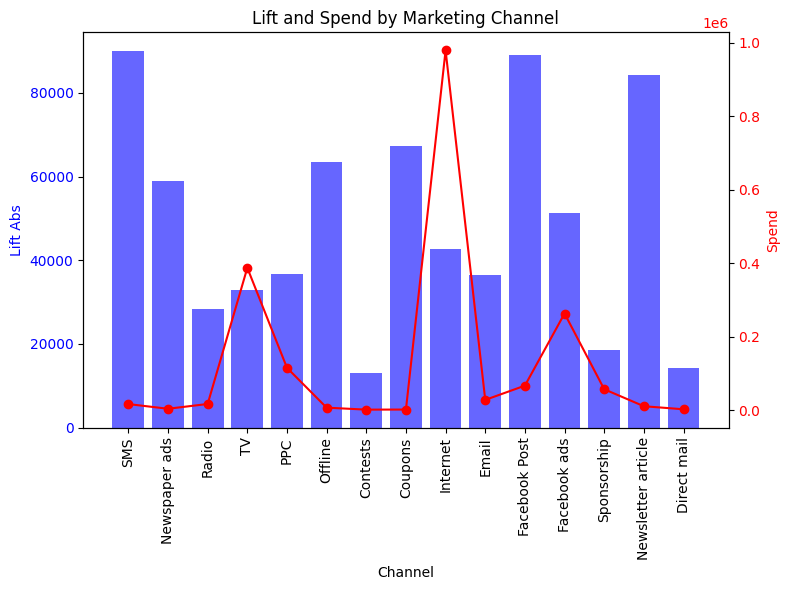

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample calibration data for plotting
data = {
    'Channel': ['SMS', 'Newspaper ads', 'Radio', 'TV', 'PPC', 'Offline', 'Contests', 'Coupons', 'Internet',
                'Email', 'Facebook Post', 'Facebook ads', 'Sponsorship', 'Newsletter article', 'Direct mail'],
    'Lift Abs': [89999.87, 59000.52, 28401.48, 32977.82, 36612.52, 63442.22, 12952.87, 67243.82, 42791.88,
                 36571.76, 89154.69, 51400.21, 18554.77, 84407.21, 14287.71],
    'Spend': [16293.66, 3556.60, 16557.56, 387175.27, 115009.50, 6543.51, 1190.76, 1431.59, 979334.65,
              27693.37, 66463.46, 262863.37, 56707.57, 10425.58, 2149.43]
}

df = pd.DataFrame(data)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for liftAbs (incremental sales impact) and spend
ax1.bar(df['Channel'], df['Lift Abs'], color='b', alpha=0.6, label='Lift Abs')
ax1.set_xlabel('Channel')
ax1.set_ylabel('Lift Abs', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=90)

# Plotting spend on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['Channel'], df['Spend'], color='r', marker='o', label='Spend')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# The Title and legends
plt.title('Lift and Spend by Marketing Channel')
fig.tight_layout()

plt.show()


In [20]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [21]:
#The updated dataset
df = pd.read_csv('/content/updated_mmm_data.csv')

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


# Listing of the marketing channels
marketing_channels = [
    'SMS', 'Newspaper ads', 'Radio', 'TV', 'PPC',
    'Offline', 'Contests', 'Coupons', 'Internet',
    'Email', 'Facebook Post', 'Facebook ads',
    'Sponsorship', 'Newsletter article', 'Direct mail'
]

# Function to create and run a basic Marketing mix modelling
def run_basic_mmm(df, channels):
    X = df[marketing_channels]
    y = df['Revenue']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Starting the timer for training time
    start_time = time.time()

    #LINEAR REGRESSION THE TRADITIONAL WAY of MMM
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Stoping the timer for training time
    training_time = time.time() - start_time

    coefficients = pd.DataFrame({'channel': channels, 'effect': model.coef_})
    coefficients = coefficients.sort_values('effect', ascending=False)

    y_pred = model.predict(X_test)
    mse = np.mean((y_test - y_pred)**2)
    nrmse = np.sqrt(mse) / np.mean(y_test)
    rmse = np.sqrt(mse)
    r2 = model.score(X_test, y_test)

    # Print all the metrics
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}")
    print(f"NRMSE: {nrmse}")
    print(f"MSE: {mse}")
    print(f"Training Time: {training_time} seconds")

    return coefficients, nrmse

# Function to select Pareto-efficient models
def select_pareto_models(model_results, min_candidates=100):
    return model_results.sort_values('NRMSE').head(min_candidates)

# Function to cluster models
def cluster_models(models, n_clusters=5):
    X = models[['NRMSE']].values
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    models['Cluster'] = kmeans.fit_predict(X)
    return models

# Function to analyze MMM outputs
def analyze_mmm_outputs(df, model_results, marketing_channels, min_candidates=100,
                        export=True, plot_folder='./mmm_plots'):

    best_models = select_pareto_models(model_results, min_candidates)
    clustered_models = cluster_models(best_models)

    if export:
        os.makedirs(plot_folder, exist_ok=True)

        plt.figure(figsize=(10, 8))
        sns.scatterplot(data=clustered_models, x='NRMSE', y='effect', hue='Cluster', palette='deep')
        plt.title('Model Performance vs Effect Size')
        plt.savefig(f'{plot_folder}/model_performance.png')
        plt.close()

        plt.figure(figsize=(20, 10))
        sns.boxplot(data=clustered_models, x='channel', y='effect')
        plt.title('Distribution of Channel Effects')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f'{plot_folder}/channel_effects_distribution.png')
        plt.close()

    clustered_models.to_csv(f'{plot_folder}/model_performance_metrics.csv', index=False)

    return clustered_models

# Running the basic MMM
coefficients, nrmse = run_basic_mmm(df, marketing_channels)

# Create model_results DataFrame
model_results = coefficients.copy()
model_results['NRMSE'] = nrmse
model_results['model_id'] = range(len(model_results))

# Run the analysis
output_collect = analyze_mmm_outputs(df, model_results, marketing_channels,
                                     min_candidates=len(model_results),
                                     export=True,
                                     plot_folder='./mmm_plots')

# Print summary of results
print(output_collect.describe())

# Selecting the best model (lowest NRMSE)
best_model = output_collect.loc[output_collect['NRMSE'].idxmin()]
print("\nBest Model:")
print(best_model)



# Plotting time series of actual vs. predicted sales for the best model
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Revenue'], label='Actual Sales')
model = LinearRegression()
model.fit(df[marketing_channels], df['Revenue'])
predicted_sales = model.predict(df[marketing_channels])
plt.plot(df['Date'], predicted_sales, label='Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.savefig('./mmm_plots/actual_vs_predicted_sales.png')
plt.close()

print("\nAnalysis complete. Please check the 'mmm_plots' folder for output visualizations.")

R²: 0.5991687099823475
RMSE: 1562594.2081879068
NRMSE: 0.5511270280098698
MSE: 2441700659462.3916
Training Time: 0.028350353240966797 seconds
             effect         NRMSE   model_id  Cluster
count  1.500000e+01  1.500000e+01  15.000000     15.0
mean   1.204608e+05  5.511270e-01   7.000000      0.0
std    4.962092e+05  1.149190e-16   4.472136      0.0
min   -9.216322e+04  5.511270e-01   0.000000      0.0
25%   -1.593053e+04  5.511270e-01   3.500000      0.0
50%   -1.804330e+03  5.511270e-01   7.000000      0.0
75%   -2.245989e+02  5.511270e-01  10.500000      0.0
max    1.908866e+06  5.511270e-01  14.000000      0.0

Best Model:
channel      Newspaper ads
effect      1908865.688129
NRMSE             0.551127
model_id                 0
Cluster                  0
Name: 1, dtype: object

Analysis complete. Please check the 'mmm_plots' folder for output visualizations.


In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

def calculate_spend_proportion(df, marketing_channels):
    """
    Calculate the actual spend proportion for each marketing channel.
    """
    total_spend = df[marketing_channels].sum(axis=1).sum()  # Total spend across all channels
    spend_proportion = df[marketing_channels].sum() / total_spend  # Proportion of total spend for each channel
    return spend_proportion

def calculate_predicted_attribution(coefficients):
    """
    Calculate the predicted attribution percentage for each marketing channel based on model coefficients.
    """
    predicted_attribution = (coefficients['effect'].abs() / coefficients['effect'].abs().sum()) * 100
    return predicted_attribution

def calculate_attribution_accuracy(spend_proportion, predicted_attribution):
    """
    Calculate the attribution accuracy by comparing spend proportion with predicted attribution.
    """
    # Calculating MAE (Mean Absolute Error) to measure the difference between spend and attribution
    mae = mean_absolute_error(spend_proportion.values, predicted_attribution.values)

    # Convert to accuracy percentage (lower MAE = higher accuracy)
    attribution_accuracy = max(0, 100 - mae)

    return attribution_accuracy

# Example usage:
spend_proportion = calculate_spend_proportion(df, marketing_channels)  # Actual spend proportions
predicted_attribution = calculate_predicted_attribution(coefficients)   # Model predicted attribution

# Calculate attribution accuracy
attribution_accuracy = calculate_attribution_accuracy(spend_proportion, predicted_attribution)

# Output the results
print(f"Actual Spend Proportion (%):\n{spend_proportion * 100}")
print(f"\nPredicted Attribution (%):\n{predicted_attribution}")
print(f"\nAttribution Accuracy: {attribution_accuracy:.2f}%")


Actual Spend Proportion (%):
SMS                    0.852246
Newspaper ads          0.179143
Radio                  1.246097
TV                    18.752688
PPC                    7.265875
Offline                0.435867
Contests               0.140091
Coupons                0.116273
Internet              43.912758
Email                  1.992503
Facebook Post          4.074391
Facebook ads          16.343441
Sponsorship            3.336914
Newsletter article     1.191746
Direct mail            0.159966
dtype: float64

Predicted Attribution (%):
1     85.252875
7      4.040917
12     1.055951
8      0.008184
9      0.011878
4      0.067481
13     0.070951
11     0.080584
14     0.148796
5      0.449765
10     0.474589
2      0.948375
3      0.994418
0      2.279084
6      4.116151
Name: effect, dtype: float64

Attribution Accuracy: 93.33%


In [25]:
# Plotting of Actual vs Predicted Values for linear regression model
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color="green", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Diagonal line
plt.title("Actual vs Predicted Revenue")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.show()



NameError: name 'y_test' is not defined

<Figure size 1000x600 with 0 Axes>

ARIMA Training Time: 9.67 seconds
Random Forest Training Time: 1.20 seconds


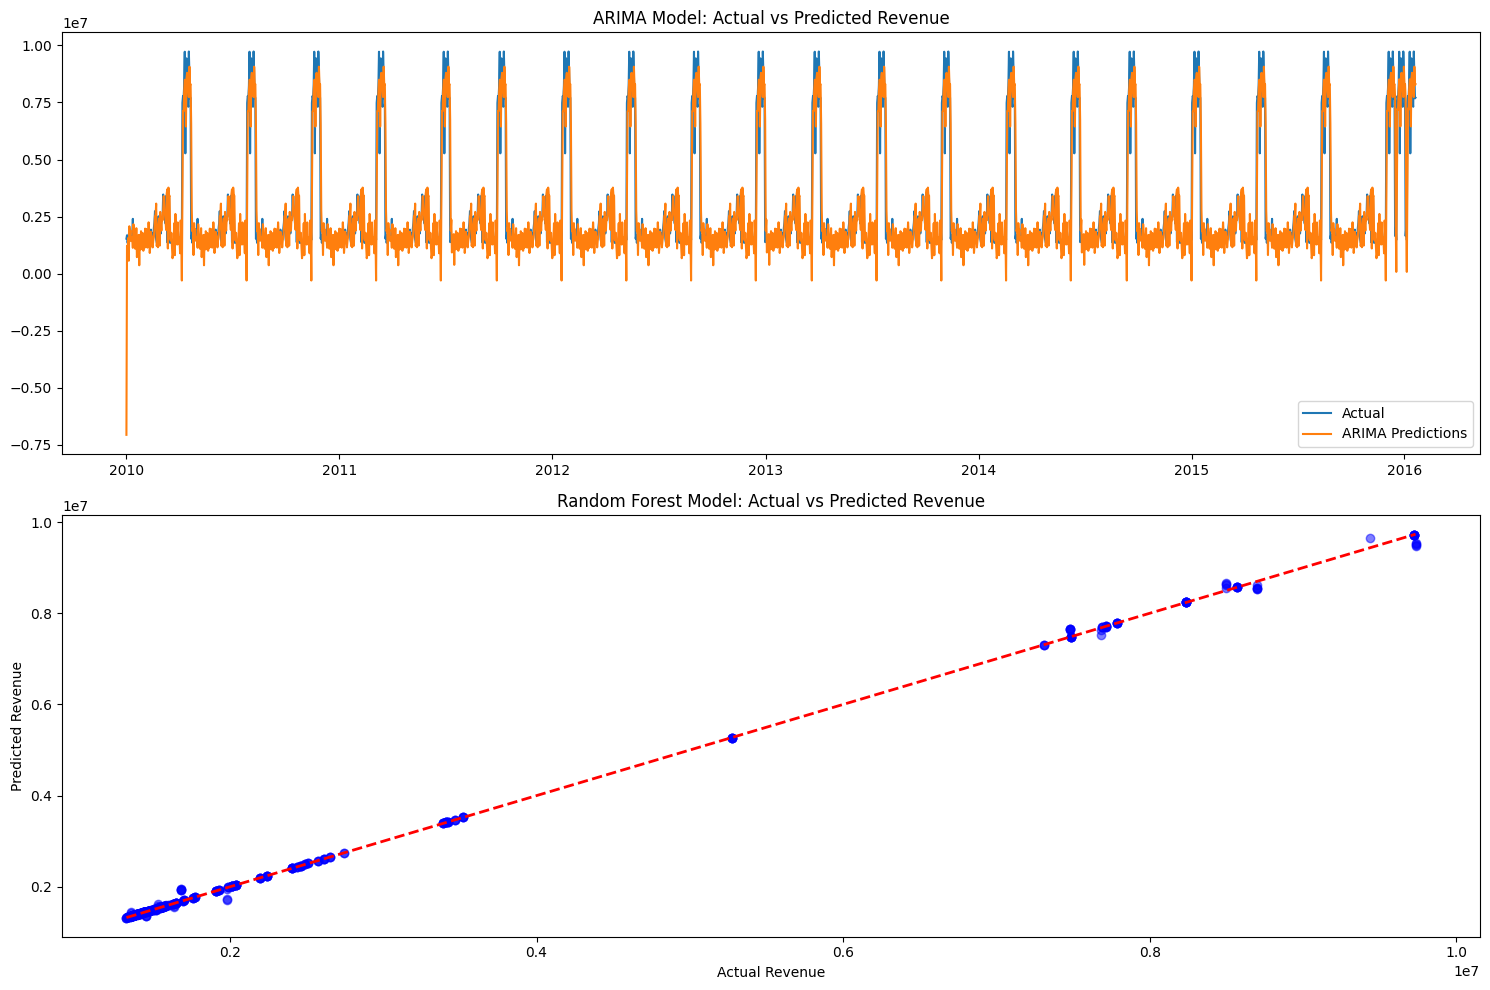

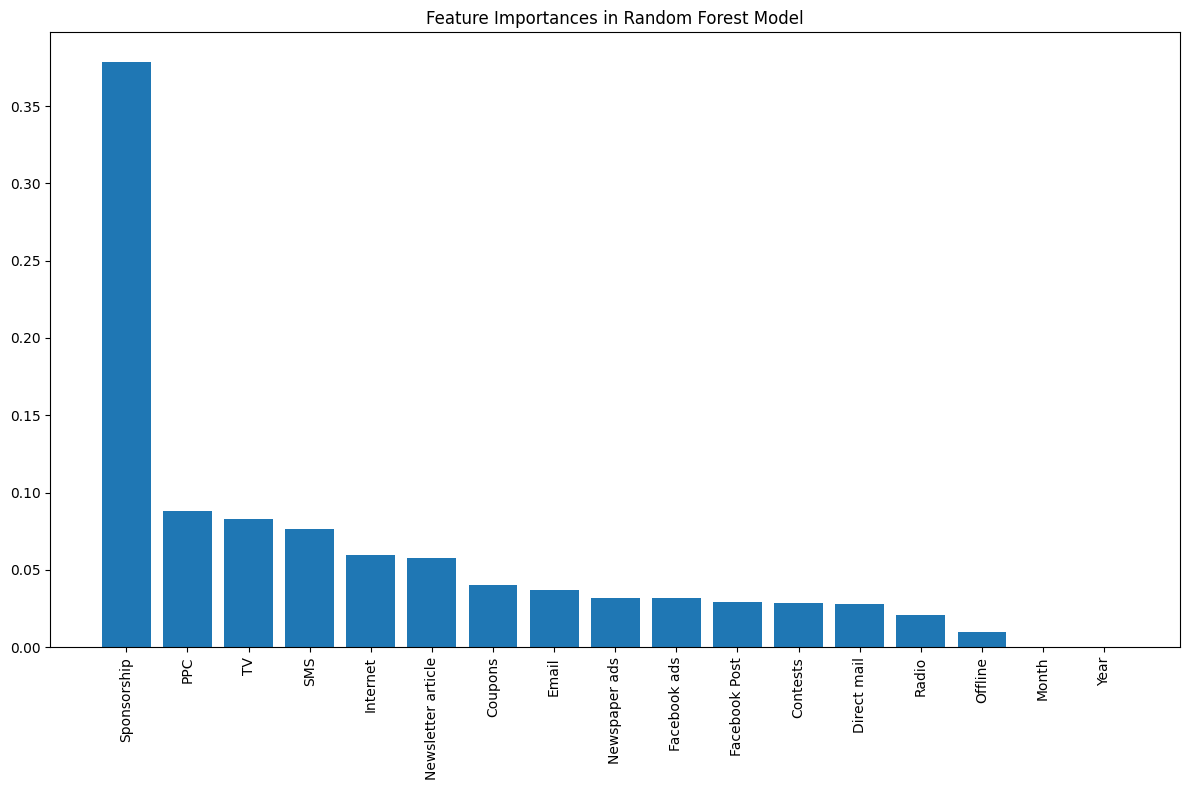


ARIMA Model Results:
MSE: 1089769196810.5857
RMSE: 1043920.1103583481
NRMSE: 0.38568258677029665
R-squared: 0.8030759751814274
MAE: 646925.6691500844
Training Time: 9.67 seconds

Random Forest Model Results:
MSE: 2479651761.2026877
RMSE: 49796.10186754268
NRMSE: 0.017563086746981788
R-squared: 0.999592938630546
MAE: 13612.205154006042
Training Time: 1.20 seconds

Analysis complete. Please check the output for detailed results and visualizations.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
import time

warnings.filterwarnings('ignore')

# List of marketing channels
marketing_channels = [
    'SMS', 'Newspaper ads', 'Radio', 'TV', 'PPC',
    'Offline', 'Contests', 'Coupons', 'Internet',
    'Email', 'Facebook Post', 'Facebook ads',
    'Sponsorship', 'Newsletter article', 'Direct mail'
]



def prepare_data(df):
    df['Date'] = pd.to_datetime(df['Date']) # Convert 'Date' column to datetime
    df = df.set_index('Date') # Set 'Date' as the index
    df['Month'] = df.index.month # Extract month from the index and create 'Month' column
    df['Year'] = df.index.year # Extract year from the index and create 'Year' column
    return df

# Now performing Time Series Analysis with ARIMA (Auto Regressive Integrated Moving Average)
def arima_model(df):
    start_time = time.time()  # Starting the timer
    model = ARIMA(df['Revenue'], exog=df[marketing_channels], order=(1, 1, 1))
    results = model.fit()
    predictions = results.predict(exog=df[marketing_channels])
    mse = mean_squared_error(df['Revenue'], predictions)
    rmse = np.sqrt(mse)
    nrmse = rmse / np.mean(df['Revenue'])
    r2 = r2_score(df['Revenue'], predictions)
    mae = mean_absolute_error(df['Revenue'], predictions)
    training_time = time.time() - start_time  # Stopping the timer
    print(f"ARIMA Training Time: {training_time:.2f} seconds")
    return results, predictions, mse, rmse, nrmse, r2, mae, training_time

# 3. Performing THE RANDOM FOREST MODEL ADVANCED MMM TECHNIQUE
def random_forest_model(df):
    X = df[marketing_channels + ['Month', 'Year']]
    y = df['Revenue']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    start_time = time.time()  # Start the timer
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time  # Stop the timer

    predictions = rf.predict(X_test_scaled)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    nrmse = rmse / np.mean(y_test)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print(f"Random Forest Training Time: {training_time:.2f} seconds")

    return rf, predictions, mse, rmse, nrmse, r2, mae, X_test, y_test, training_time

# 4. Visualisinf the Results
def plot_results(df, arima_pred, rf_pred, X_test, y_test):
    plt.figure(figsize=(15, 10))

    # ARIMA results
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['Revenue'], label='Actual')
    plt.plot(df.index, arima_pred, label='ARIMA Predictions')
    plt.title('ARIMA Model: Actual vs Predicted Revenue')
    plt.legend()

    # Random Forest results
    plt.subplot(2, 1, 2)
    plt.scatter(y_test, rf_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Revenue')
    plt.ylabel('Predicted Revenue')
    plt.title('Random Forest Model: Actual vs Predicted Revenue')

    plt.tight_layout()
    plt.show()

# 5. Feature Importance (for Random Forest)
def plot_feature_importance(rf_model, feature_names):
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances in Random Forest Model")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Main execution
df = prepare_data(df)

# ARIMA Model
arima_results, arima_predictions, arima_mse, arima_rmse, arima_nrmse, arima_r2, arima_mae, arima_training_time = arima_model(df)

# Random Forest Model
rf_model, rf_predictions, rf_mse, rf_rmse, rf_nrmse, rf_r2, rf_mae, X_test, y_test, rf_training_time = random_forest_model(df)

# Visualize Results
plot_results(df, arima_predictions, rf_predictions, X_test, y_test)

# Plot Feature Importance
plot_feature_importance(rf_model, marketing_channels + ['Month', 'Year'])

# Print Results for ARIMA
print("\nARIMA Model Results:")
print(f"MSE: {arima_mse}")
print(f"RMSE: {arima_rmse}")
print(f"NRMSE: {arima_nrmse}")
print(f"R-squared: {arima_r2}")
print(f"MAE: {arima_mae}")
print(f"Training Time: {arima_training_time:.2f} seconds")

# Print Results for Random Forest
print("\nRandom Forest Model Results:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"NRMSE: {rf_nrmse}")
print(f"R-squared: {rf_r2}")
print(f"MAE: {rf_mae}")
print(f"Training Time: {rf_training_time:.2f} seconds")

# Save detailed results to CSV
results_df = pd.DataFrame({
    'Model': ['ARIMA', 'Random Forest'],
    'MSE': [arima_mse, rf_mse],
    'RMSE': [arima_rmse, rf_rmse],
    'NRMSE': [arima_nrmse, rf_nrmse],
    'R-squared': [arima_r2, rf_r2],
    'MAE': [arima_mae, rf_mae],
    'Training Time (seconds)': [arima_training_time, rf_training_time]
})
results_df.to_csv('model_comparison_results.csv', index=False)

print("\nAnalysis complete. Please check the output for detailed results and visualizations.")


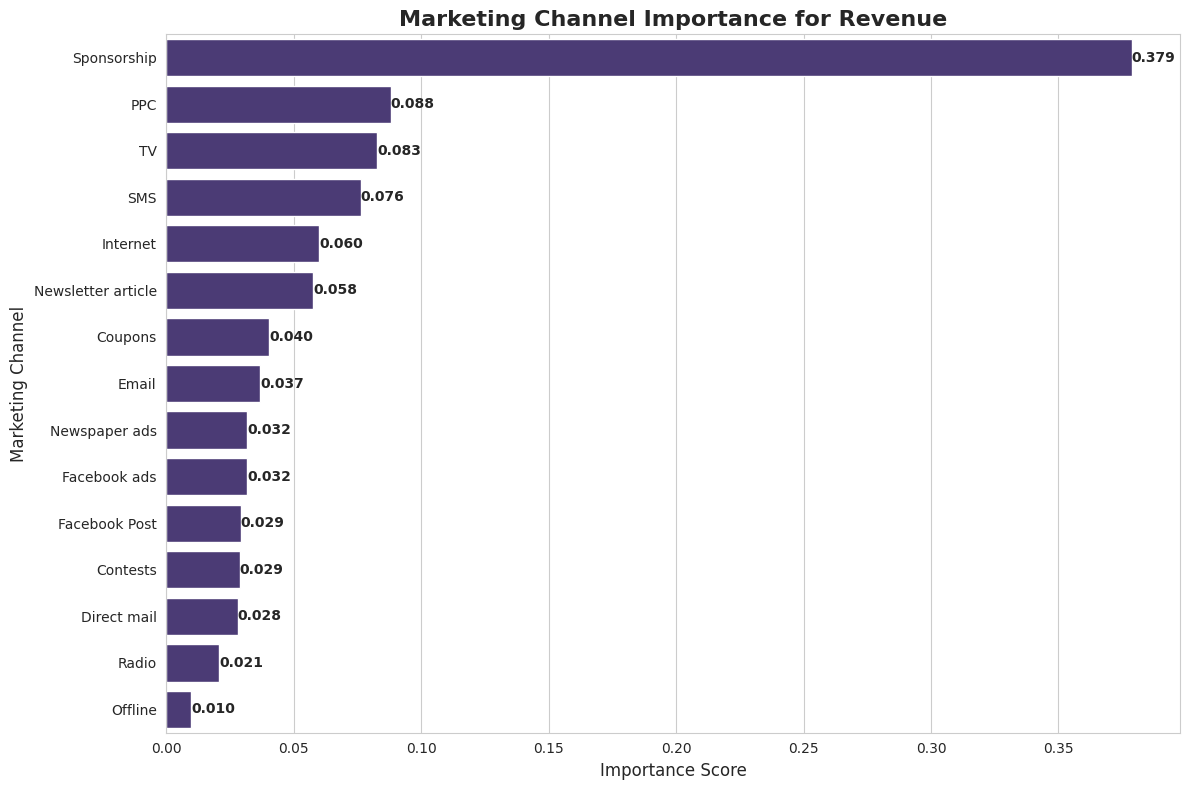

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_feature_importance(rf_model, feature_names):
    # Get feature importances
    importances = rf_model.feature_importances_


    importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances[:len(feature_names)]})


    # Sorting by importance
    importance_df = importance_df.sort_values('importance', ascending=False)

    # Creating the plot
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    sns.set_palette("viridis")

    ax = sns.barplot(x='importance', y='feature', data=importance_df)

    # Customizing the plot
    plt.title("Marketing Channel Importance for Revenue", fontsize=16, fontweight='bold')
    plt.xlabel("Importance Score", fontsize=12)
    plt.ylabel("Marketing Channel", fontsize=12)

    # Adding value labels to the end of each bar
    for i, v in enumerate(importance_df['importance']):
        ax.text(v, i, f'{v:.3f}', va='center', fontweight='bold')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_feature_importance(rf_model, marketing_channels)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

def analyze_mmm_outputs(df, model_results, marketing_channels, min_candidates=100,
                        export=True, plot_folder='./mmm_plots'):

    # Select Pareto-efficient models
    best_models = select_pareto_models(model_results, min_candidates)

    # Cluster models
    clustered_models = cluster_models(best_models)

    # Generate visualizations
    if export:
        os.makedirs(plot_folder, exist_ok=True)

        # Pareto front plot
        plt.figure(figsize=(10, 8))
        # Check if 'NRMSE' and 'DECOMP.RSSD' columns exist
        if 'NRMSE' in clustered_models.columns and 'DECOMP.RSSD' in clustered_models.columns:
            sns.scatterplot(data=clustered_models, x='NRMSE', y='DECOMP.RSSD', hue='Cluster', palette='deep')
            plt.title('Pareto Front of Model Performance')
            plt.savefig(f'{plot_folder}/pareto_front.png')
        else:
            print("Error: 'NRMSE' or 'DECOMP.RSSD' column not found in clustered_models DataFrame.")
        plt.close()

        # Variable effects plot
        plt.figure(figsize=(20, 10))


        # Find effect columns that are actually present in the data
        effect_columns = [col for col in clustered_models.columns if col.endswith('_effect')]



        if effect_columns:
            sns.boxplot(data=clustered_models.melt(id_vars='Cluster', value_vars=effect_columns, var_name='Channel', value_name='Effect'))
            plt.title('Distribution of Channel Effects Across Model Clusters')
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.savefig(f'{plot_folder}/channel_effects_distribution.png')
        else:
            print("No effect columns found in the data. Skipping channel effects plot.")
        plt.close()

    # Export results to CSV
    clustered_models.to_csv(f'{plot_folder}/model_performance_metrics.csv', index=False)

    return clustered_models

# Run the analysis
output_collect = analyze_mmm_outputs(df, model_results, marketing_channels,
                                     min_candidates=100,
                                     export=True,
                                     plot_folder='./mmm_plots')

# Print summary of results
print(output_collect.describe())

# Select the best model (lowest NRMSE)
best_model = output_collect.loc[output_collect['NRMSE'].idxmin()]
print("\nBest Model:")
print(best_model)

# Plot time series of actual vs. predicted sales for the best model
plt.figure(figsize=(12, 6))

# Check if 'Date' column exists. If not, use index instead.
if 'Date' in df.columns:
    plt.plot(df['Date'], df['Revenue'], label='Actual Sales')
    # Replace the line below with your actual predictions if available
    plt.plot(df['Date'], df['Revenue'] * (1 + np.random.normal(0, 0.1, len(df))), label='Predicted Sales (Placeholder)')
else:
    plt.plot(df.index, df['Revenue'], label='Actual Sales')
    # Replace the line below with your actual predictions if available, ensuring the index is used
    plt.plot(df.index, df['Revenue'] * (1 + np.random.normal(0, 0.1, len(df))), label='Predicted Sales (Placeholder)')

plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.savefig('./mmm_plots/actual_vs_predicted_sales.png')
plt.close()

Error: 'NRMSE' or 'DECOMP.RSSD' column not found in clustered_models DataFrame.
No effect columns found in the data. Skipping channel effects plot.
             effect         NRMSE   model_id  Cluster
count  1.500000e+01  1.500000e+01  15.000000     15.0
mean   1.204608e+05  5.511270e-01   7.000000      0.0
std    4.962092e+05  1.149190e-16   4.472136      0.0
min   -9.216322e+04  5.511270e-01   0.000000      0.0
25%   -1.593053e+04  5.511270e-01   3.500000      0.0
50%   -1.804330e+03  5.511270e-01   7.000000      0.0
75%   -2.245989e+02  5.511270e-01  10.500000      0.0
max    1.908866e+06  5.511270e-01  14.000000      0.0

Best Model:
channel      Newspaper ads
effect      1908865.688129
NRMSE             0.551127
model_id                 0
Cluster                  0
Name: 1, dtype: object


# **GP Model to compare "MMM is broken"**

In [33]:
# Importing libraries for GP Model
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df[marketing_channels + ['Month', 'Year']]  # Features
y = df['Revenue']  # Target variable

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the kernel: RBF kernel with a constant kernel as product
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Creating the Gaussian Process Regressor model
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# Fitting the model to the training data
gp_model.fit(X_train_scaled, y_train)

# Now Making predictions on the test data
y_pred_gp = gp_model.predict(X_test_scaled)

# Evaluating the GP model
mse_gp = mean_squared_error(y_test, y_pred_gp)
r2_gp = r2_score(y_test, y_pred_gp)
nrmse_gp = np.sqrt(mse_gp) / np.mean(y_test) * 100
rmse_gp = np.sqrt(mse_gp)


# Print the evaluation metrics (GP MODEL)
print(f"Gaussian Process Regression - Mean Squared Error: {mse_gp}")
print(f"Gaussian Process Regression - R-squared: {r2_gp}")
print(f"Gaussian Process Regression - NRMSE: {nrmse_gp}")
print(f"Gaussian Process Regression - RMSE: {rmse_gp}")



Gaussian Process Regression - Mean Squared Error: 128717887904.13068
Gaussian Process Regression - R-squared: 0.9788695813890962
Gaussian Process Regression - NRMSE: 12.653916145045807
Gaussian Process Regression - RMSE: 358772.75245499157


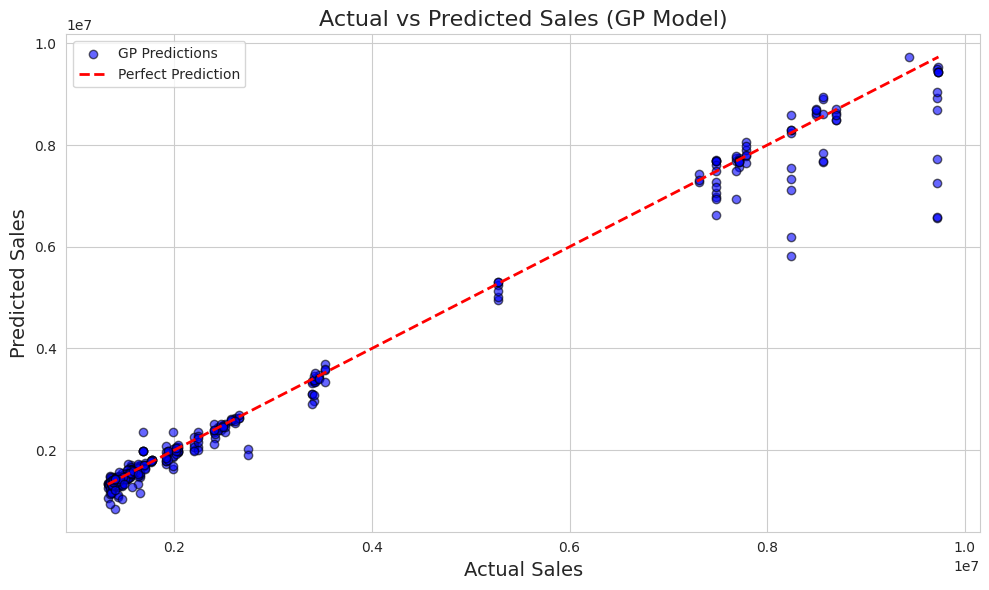

In [34]:
import matplotlib.pyplot as plt

# Scatter plot for Actual vs Predicted values (GP Model)
plt.figure(figsize=(10, 6))

# Create scatter plot for Actual vs Predicted
plt.scatter(y_test, y_pred_gp, color='blue', alpha=0.6, edgecolor='k', label='GP Predictions')

# Plot a 45-degree line (Perfect Prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

# Set title and labels
plt.title('Actual vs Predicted Sales (GP Model)', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


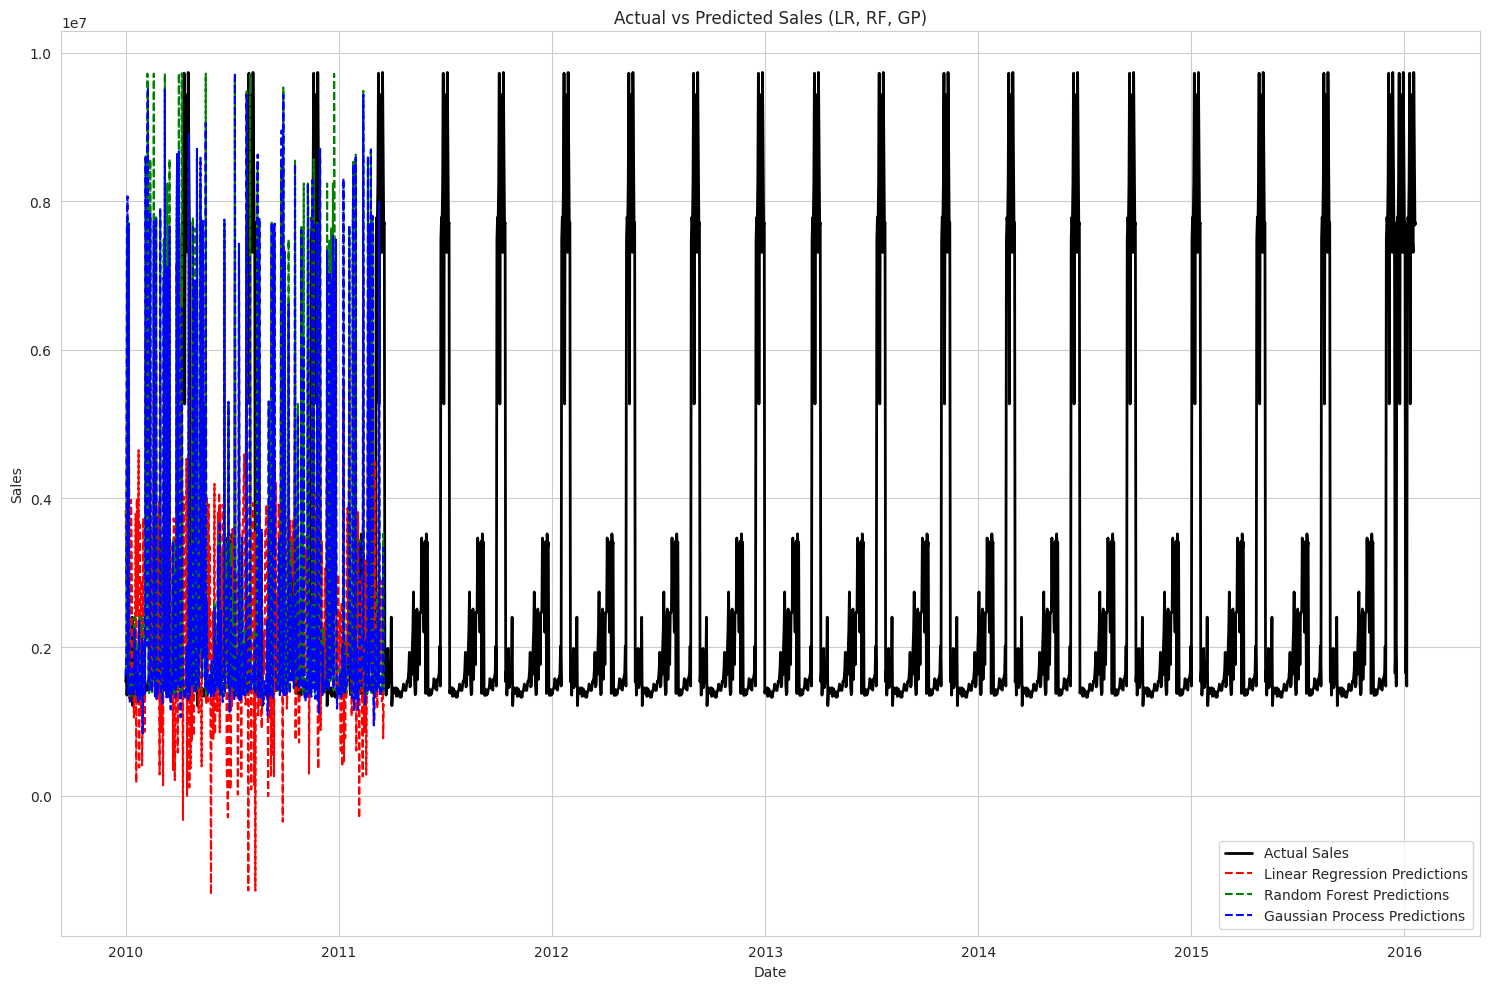

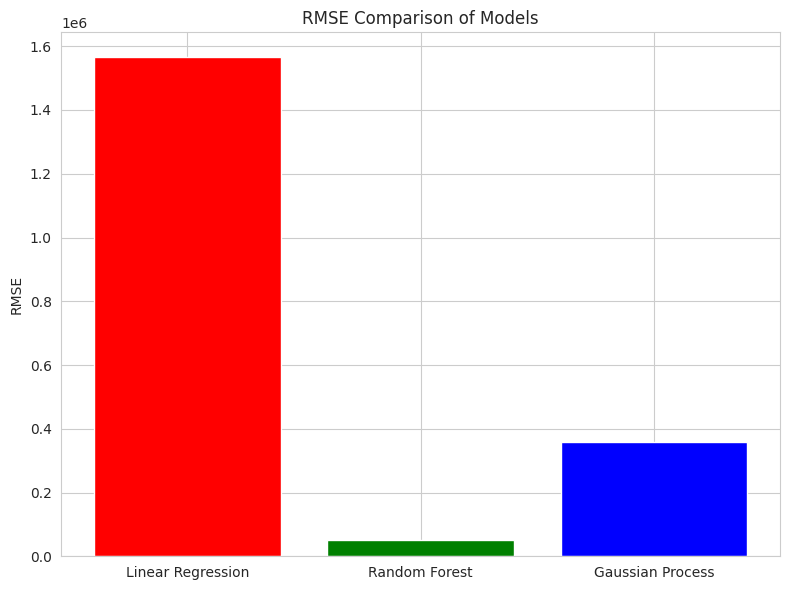

Linear Regression MSE: 2450376521783.138, R-squared: 0.5977444743486453
Random Forest MSE: 2479651761.2026877, R-squared: 0.999592938630546
Gaussian Process MSE: 128717887904.13068, R-squared: 0.9788695813890962


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare Data
def prepare_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    return df


# List of marketing channels
marketing_channels = [
    'SMS', 'Newspaper ads', 'Radio', 'TV', 'PPC',
    'Offline', 'Contests', 'Coupons', 'Internet',
    'Email', 'Facebook Post', 'Facebook ads',
    'Sponsorship', 'Newsletter article', 'Direct mail'
]

# 2. Linear Regression Model
def linear_regression_model(df):
    X = df[marketing_channels + ['Month', 'Year']]
    y = df['Revenue']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fitting the Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Making predictions
    predictions = lr.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return lr, predictions, mse, r2, X_test, y_test

    # Random Forest Model
def random_forest_model(df):
    X = df[marketing_channels + ['Month', 'Year']]
    y = df['Revenue']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = rf.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rf, predictions, mse, r2, X_test, y_test

    # Gaussian Process Model
def gaussian_process_model(df):
    X = df[marketing_channels + ['Month', 'Year']]
    y = df['Revenue']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the kernel for Gaussian Process (RBF kernel)
    kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

    # Create Gaussian Process Regressor model
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

    # Fit the GP model to the training data
    gp.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = gp.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return gp, predictions, mse, r2, X_test, y_test

   # Plotting Actual vs Predicted Sales for all the Models (Linear regression, random forest & Gaussians processes)
def plot_actual_vs_predicted(df, lr_pred, rf_pred, gp_pred, y_test):
    plt.figure(figsize=(15, 10))

    # Plotting actual sales
    plt.plot(df.index, df['Revenue'], label='Actual Sales', color='black', linewidth=2)

    # Plotting LR predictions
    plt.plot(df.index[:len(lr_pred)], lr_pred, label='Linear Regression Predictions', color='red', linestyle='--')

    # Plotting RF predictions
    plt.plot(df.index[:len(rf_pred)], rf_pred, label='Random Forest Predictions', color='green', linestyle='--')

    # Plotting GP predictions
    plt.plot(df.index[:len(gp_pred)], gp_pred, label='Gaussian Process Predictions', color='blue', linestyle='--')

    plt.title('Actual vs Predicted Sales (LR, RF, GP)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.tight_layout()
    plt.savefig('actual_vs_predicted_sales_comparison.png')
    plt.show()

# 6. Plotting RMSE Comparison
def plot_rmse_comparison(rmse_lr, rmse_rf, rmse_gp):
    models = ['Linear Regression', 'Random Forest', 'Gaussian Process']
    rmse_values = [rmse_lr, rmse_rf, rmse_gp]

    plt.figure(figsize=(8, 6))
    plt.bar(models, rmse_values, color=['red', 'green', 'blue'])
    plt.title('RMSE Comparison of Models')
    plt.ylabel('RMSE')
    plt.tight_layout()
    plt.savefig('rmse_comparison.png')
    plt.show()

# Main Execution

# Linear Regression Model
lr_model, lr_predictions, lr_mse, lr_r2, X_test, y_test = linear_regression_model(df)

# Random Forest Model
rf_model, rf_predictions, rf_mse, rf_r2, X_test, y_test = random_forest_model(df)

# Gaussian Process Model
gp_model, gp_predictions, gp_mse, gp_r2, X_test, y_test = gaussian_process_model(df)

# Visualize Actual vs Predicted Sales
plot_actual_vs_predicted(df, lr_predictions, rf_predictions, gp_predictions, y_test)

# Compare RMSE between models
rmse_lr = np.sqrt(lr_mse)
rmse_rf = np.sqrt(rf_mse)
rmse_gp = np.sqrt(gp_mse)

plot_rmse_comparison(rmse_lr, rmse_rf, rmse_gp)

# Print Results for Each Model
print(f"Linear Regression MSE: {lr_mse}, R-squared: {lr_r2}")
print(f"Random Forest MSE: {rf_mse}, R-squared: {rf_r2}")
print(f"Gaussian Process MSE: {gp_mse}, R-squared: {gp_r2}")



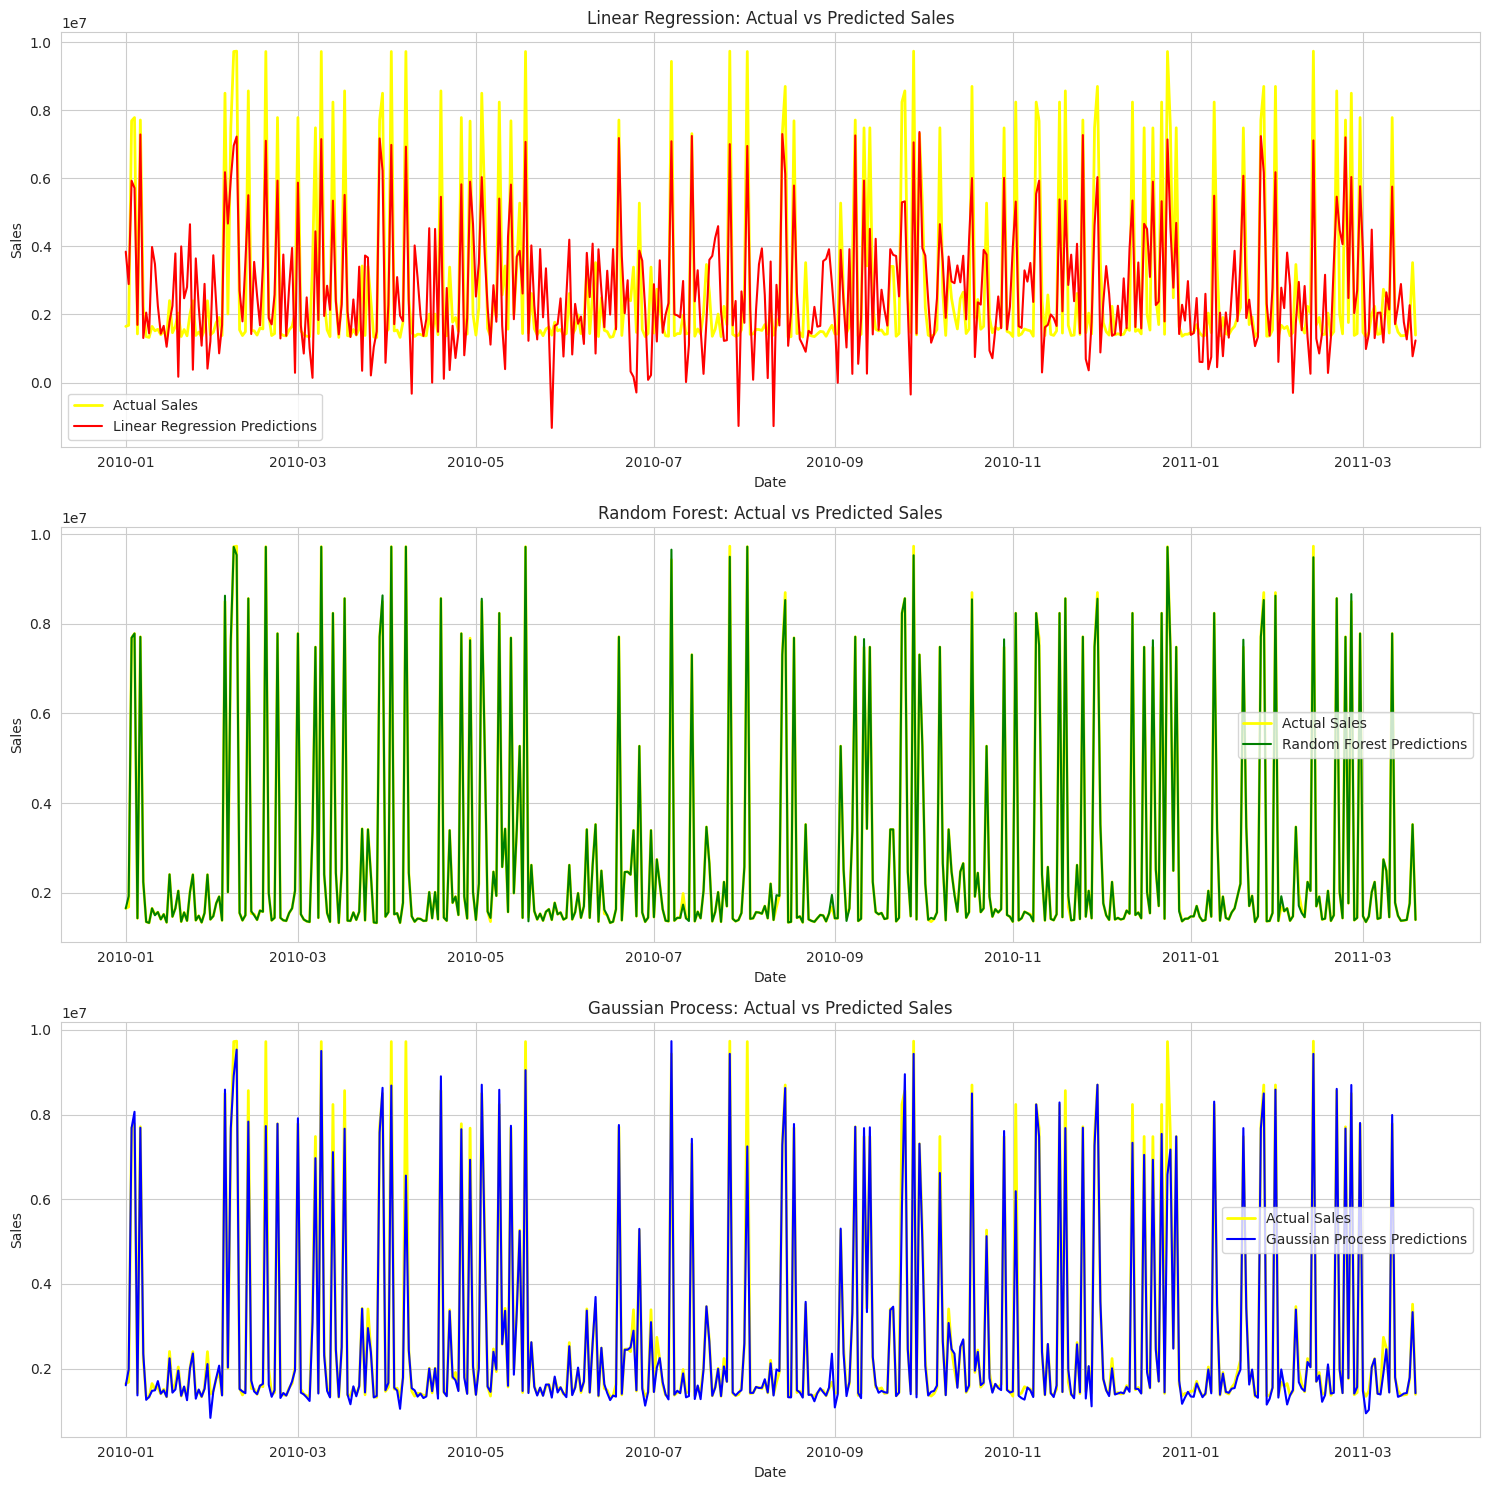

In [36]:
# Now Plotting Actual vs Predicted Sales for each model separately
def plot_actual_vs_predicted_individual(df, lr_pred, rf_pred, gp_pred, y_test):
    plt.figure(figsize=(15, 15))

    # Subplot 1: Linear Regression
    plt.subplot(3, 1, 1)
    plt.plot(df.index[:len(lr_pred)], y_test, label='Actual Sales', color='yellow', linewidth=2)
    plt.plot(df.index[:len(lr_pred)], lr_pred, label='Linear Regression Predictions', color='red', linestyle='-')
    plt.title('Linear Regression: Actual vs Predicted Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()

    # Subplot 2: Random Forest
    plt.subplot(3, 1, 2)
    plt.plot(df.index[:len(rf_pred)], y_test, label='Actual Sales', color='yellow', linewidth=2)
    plt.plot(df.index[:len(rf_pred)], rf_pred, label='Random Forest Predictions', color='green', linestyle='-')
    plt.title('Random Forest: Actual vs Predicted Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()

    # Subplot 3: Gaussian Process
    plt.subplot(3, 1, 3)
    plt.plot(df.index[:len(gp_pred)], y_test, label='Actual Sales', color='yellow', linewidth=2)
    plt.plot(df.index[:len(gp_pred)], gp_pred, label='Gaussian Process Predictions', color='blue', linestyle='-')
    plt.title('Gaussian Process: Actual vs Predicted Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()

    plt.tight_layout()
    plt.savefig('actual_vs_predicted_individual_models.png')
    plt.show()
# This comparison plot will help the reader to understand that random forest makes better prediction
# Execute the individual plots for each model
plot_actual_vs_predicted_individual(df, lr_predictions, rf_predictions, gp_predictions, y_test)
